# Alabama Turns a Little Blue
### Political Contributions in the Alabama Special Election

Earlier this month, Democrat Doug Jones defeated Republican Roy Moore in a special election for the Senate seat occupied by now-Attorney General, Jeff Sessions. Doug Jones won by a [margin](http://www.cnn.com/2017/12/12/politics/alabama-election-latest/index.html) of 1.5 points (49.9 to 48.4) narrowing an already slim majority in the senate for Republicans to just 51 seats.

The explosiveness of a campaign roiled in sexual misconduct claims, party divisions, and ultimately an underdog victory that turned a state from this in 2014...

<img src="2014_senate_election.png", height="150", width="241"/>

to this, a couple weeks ago:

<img src = "2017_senate_election.png", height="150", width="241"/>

...made me want to look at none other than those sweet sweet **campaign contributions**.

In [71]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
from dateutil import parser
import datetime
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')

In [72]:
jones = pd.read_csv('doug_jones.csv')
moore = pd.read_csv('roy_moore.csv')

In [73]:
contribution_summary = pd.DataFrame({
        'Doug Jones': round(jones['contribution_receipt_amount'].describe(), 2),
        'Roy Moore': round(moore['contribution_receipt_amount'].describe(), 2)
    })
contribution_summary

,Doug Jones,Roy Moore
count,44263.00,6527.00
mean,239.59,441.64
std,596.76,1849.22
min,0.00,-500.00
25%,25.00,50.00
50%,100.00,100.00
75%,250.00,250.00
max,79000.00,94375.00


Doug Jones had almost 7 times as many contributions as his opponent, though Moore had larger contributions on average; let's take a look at how much each candidate actually made.

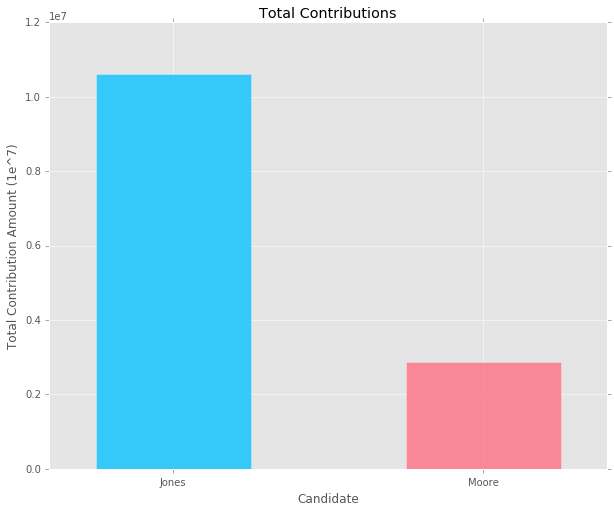

In [352]:
candidates = ['Jones', 'Moore']
x_pos = np.arange(len(candidates))

plt.figure(figsize=(10,8))
plt.bar(
    x_pos,
    [sum(jones['contribution_receipt_amount']), sum(moore['contribution_receipt_amount'])],
    align = 'center', 
    alpha = 0.8, 
    width = 0.5,
    color = ['#09C2FF', '#FF7081']
)

plt.title('Total Contributions')
plt.xticks(x_pos, candidates)
plt.xlabel('Candidate')
plt.ylabel('Total Contribution Amount (1e^7)');

In [75]:
# For reference

[round(sum(jones['contribution_receipt_amount']), 1),
round(sum(moore['contribution_receipt_amount']), 0)]

[10605163.4, 2882611.0]

Doug Jones raised about **$10.6M** while Roy Moore only raised about **\$2.9M** in campaign contributions. Money is critical for any successful campaign but not all campaigns that raise a ludicrous amount of money end up being successful, some case studies include [Meg Whitman's gubernatorial run in California in 2010](https://en.wikipedia.org/wiki/Meg_Whitman#2010_campaign_for_California_Governor) or [Hillary Clinton's run for President in 2016](https://www.bloomberg.com/politics/graphics/2016-presidential-campaign-fundraising/). So what set this apart? 

## National Spotlight

Starting in mid-October, allegations of Roy Moore's inappropriate actions with underage girls began to surface. Then on November 9th, the Washington Post published an [article](https://www.washingtonpost.com/investigations/woman-says-roy-moore-initiated-sexual-encounter-when-she-was-14-he-was-32/2017/11/09/1f495878-c293-11e7-afe9-4f60b5a6c4a0_story.html?utm_term=.089b380babdc) about the allegations. This drew the attention of the nation to this special election. Prior to these allegations, the race in Alabama was [Republican's to lose](https://fivethirtyeight.com/features/six-unlikely-scenarios-that-could-change-the-2018-senate-map/). Seeing a chink in the armor and galvanized by an unpopular president, small-donor Democrats from across the nation donated to Doug Jones campaign. After the allegations began coming to light in October, campaign contributions spiked tremendously for Jones while remaining tepid for Moore: 

In [76]:
def datetime_conversion(dataframe, col):
    datetime_lst = []
    for ind in range(len(dataframe)):
        datetime_lst += [dataframe.iloc[ind][col]]
    return datetime_lst

jones_datetimes = datetime_conversion(jones, 'date')
moore_datetimes = datetime_conversion(moore, 'date')

In [77]:
jones['datetime'] = jones_datetimes
moore['datetime'] = moore_datetimes

In [78]:
jones_contributions = jones[['datetime', 'contribution_receipt_amount']].groupby(
    'datetime').sum()
jones_contributions = jones_contributions.reset_index()
moore_contributions = moore[['datetime', 'contribution_receipt_amount']].groupby(
    'datetime').sum()
moore_contributions = moore_contributions.reset_index()

In [80]:
jones_datetimes = [parser.parse(jones_contributions.iloc[ind]['datetime']) 
                    for ind in range(len(jones_contributions))]
moore_datetimes = [parser.parse(moore_contributions.iloc[ind]['datetime'])
                    for ind in range(len(moore_contributions))]

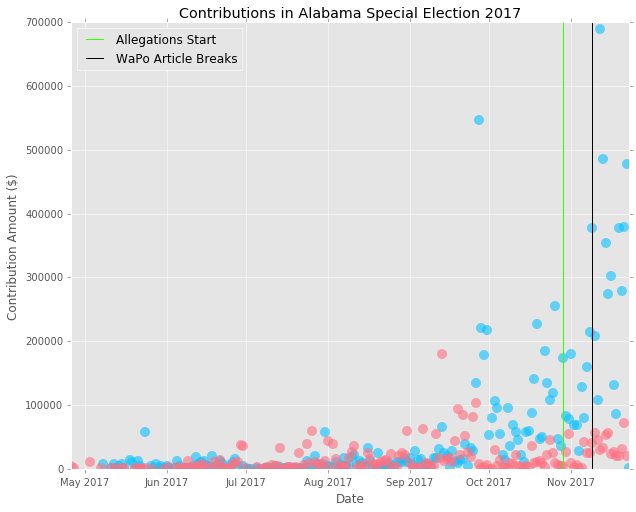

In [347]:
jones_dates = matplotlib.dates.date2num(jones_datetimes)
moore_dates = matplotlib.dates.date2num(moore_datetimes)

fig, ax = plt.subplots(figsize=(10,8))

ax.plot_date(x=jones_dates[1:], 
              y=jones_contributions['contribution_receipt_amount'][1:],
              color = '#09C2FF', alpha = 0.6, markeredgewidth=0.0,
              markersize=10.0)

ax.plot_date(x=moore_dates,
            y=moore_contributions['contribution_receipt_amount'],
            color = '#FF7081', alpha = 0.6, markeredgewidth=0.0,
            markersize=10.0)

allegations_start = plt.axvline(736631.0, color = '#35FF00')
wp_article_breaks = plt.axvline(736642.0, color = 'black')

plt.legend([allegations_start, wp_article_breaks], ['Allegations Start', 'WaPo Article Breaks'], 
          loc = 2)

plt.title('Contributions in Alabama Special Election 2017')
plt.xlabel('Date')
plt.ylabel('Contribution Amount ($)')

Additionally, Republicans on Capitol Hill took stands in the race after the allegations. While establishment Republicans like Mitch McConnell backed an establishment ally in Luther Strange; the brand of more "provacative" (is that the right word?) Republicans like Donald Trump and Steve Bannon, backed Roy Moore until election day. Only a small percentage of people [wrote-in](https://www.washingtonpost.com/special-election-results/alabama/) their votes and while it certainly isn't a deciding factor in Moore's defeat, it's something to consider especially because of how thin the margin of victory was.

## Establishment Pullback

2018 is a huge year for Senate Republicans. While incumbent Democrats have more seats up for election (24, plus 2 independent candidates who caucus with them), Republicans' nightmare would be losing their already-thin majority in the 8 races in which they are incumbents. Supporting Moore to the end despite the allegations against him, may have been too damaging for the Republican brand in the 2018 races. While some PACs/organizations supported Moore until the end (*e.g.* Senate Conservatives Fund, Club for Growth), others withdrew their support or even donated to Luther Strange in the final days of campaigning (*e.g.* LEE PAC, Rely On Your Beliefs PAC). This left Moore with substantially less funds from large donors particularly towards the end of the election:

In [315]:
org_table = moore[moore['is_individual'] == 'f'].groupby('date').sum().reset_index()

org_contributions = []

for elem in moore_contributions['datetime']:
    if elem in list(org_table['date']):
        org_contributions += [org_table[org_table['date'] == elem].iloc[0]['contribution_receipt_amount']]
    else:
        org_contributions += [0]

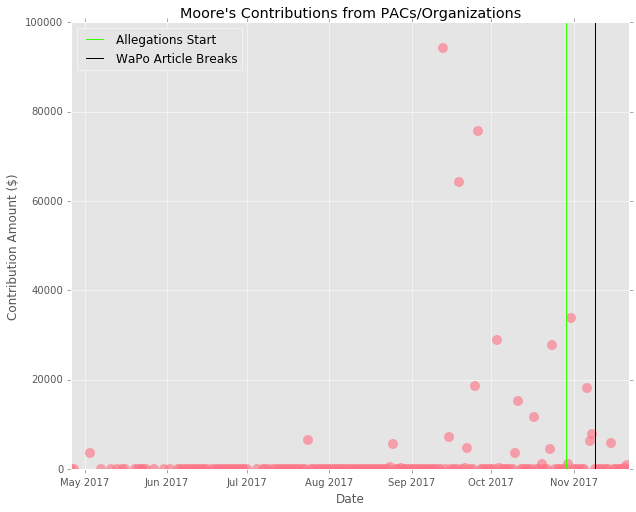

In [348]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot_date(x=moore_dates,
            y=org_contributions,
            color = '#FF7081', alpha = 0.6, markeredgewidth=0.0,
            markersize=10.0)

allegations_start = plt.axvline(736631.0, color = '#35FF00')
wp_article_breaks = plt.axvline(736642.0, color = 'black')

plt.legend([allegations_start, wp_article_breaks], ['Allegations Start', 'WaPo Article Breaks'], 
          loc = 2)

plt.title("Moore's Contributions from PACs/Organizations")
plt.xlabel('Date')
plt.ylabel('Contribution Amount ($)')

In [322]:
matplotlib.dates.date2num(datetime.datetime(2017, 10, 29, 0, 0))

736631.0

## Small Note on ActBlue

While both candidates attracted donations from non-Alabamans, a significant portion of Doug Jones' contributions were raised through the Democratic fundraising app [ActBlue](https://secure.actblue.com/), about $4.7M (47% of all Jones' contributions) were raised through ActBlue. ActBlue is an interesting tool. It's emphasis on user-friendly mobile use can change the face of any campaign fundamentally by engaging young voters, removing frictions to donating for individuals, collecting data on donors and targeting potential donors, and, obviously, crowdsourcing campaign funds.

In [134]:
# Individual, non-ActBlue contributions for Doug Jones (non-Alabama)
jones_alabama = jones[jones['contributor_state'] != 'AL']
jones_alabama = jones_alabama[jones_alabama['is_individual'] == 't']
len(jones_alabama) / len(jones)

0.4219777240584687

In [150]:
# ActBlue contributions for Doug Jones
actblue = [len(jones[jones['contributor_name'] == 'ACTBLUE']) / len(jones), 
           len(jones[jones['contributor_name'] == 'ACTBLUE TECHNICAL SERVICES']) / len(jones)]
actblue

[0.4522287237647697, 0.01705713575672684]

In [162]:
grouped_by_name = jones.groupby('contributor_name').sum().reset_index()
(grouped_by_name.iloc[51]['contribution_receipt_amount'] + 
 grouped_by_name.iloc[52]['contribution_receipt_amount'])

4071434.2800000003

In [136]:
# Individual contributions for Roy Moore (non-Alabamahttps://secure.actblue.com/)
moore_alabama = moore[moore['contributor_state'] != 'AL']
moore_alabama = moore_alabama[moore_alabama['is_individual'] == 't']
len(moore_alabama) / len(moore)

0.8366784127470507

## Conclusion

Roy Moore was the favorite in this race, I personally still thought he'd win despite the allegations. But Republicans and myself couldn't foresee the proverbial firestorm that ensued from the  combination of a national controversy, momentum shifts in contributions, and [turnout from the African-American community](https://www.nytimes.com/2017/12/14/us/blacks-alabama-doug-jones-.html). It's going to be very interesting to see how the 2018 races shape up given the unpredictability/unpopularity of Donald Trump, the lessons Republicans learned from this race, and the interrelated dynamics of national stories and campaign funding. 